# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
%matplotlib notebook

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(study_results, mouse_metadata, 
                     how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice.
mice_check = mouse_study_merge['Mouse ID'].nunique()
mice_check

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_merge.count() - No missing data
#concatenate ID and Timepoint
mouse_study_merge["ID_Time"] = mouse_study_merge["Mouse ID"].map(str) + mouse_study_merge["Timepoint"].map(str)

#Number of duplicated is 5
mouse_study_merge["ID_Time"].duplicated().sum()

#list duplicated
mouse_study_merge["ID_Time"].loc[mouse_study_merge["ID_Time"].duplicated()]

137      g9890
360      g9895
681     g98910
869     g98915
1111    g98920
Name: ID_Time, dtype: object

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
id_time_df = mouse_study_merge.drop_duplicates("ID_Time")
id_time_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),ID_Time
0,b128,0,45.000000,0,Capomulin,Female,9,22,b1280
1,f932,0,45.000000,0,Ketapril,Male,15,29,f9320
2,g107,0,45.000000,0,Ketapril,Female,2,29,g1070
3,a457,0,45.000000,0,Ketapril,Female,11,30,a4570
4,c819,0,45.000000,0,Ketapril,Male,21,25,c8190
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,r94445
1889,u364,45,31.023923,3,Capomulin,Male,18,17,u36445
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,p43845
1891,x773,45,58.634971,4,Placebo,Female,21,30,x77345


In [31]:
# Checking the number of mice in the clean DataFrame.
mice_check2 = id_time_df['Mouse ID'].nunique()
mice_check2

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Dev":sd, "SEM":sem})
summary


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
#Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line.



## Bar and Pie Charts

<IPython.core.display.Javascript object>


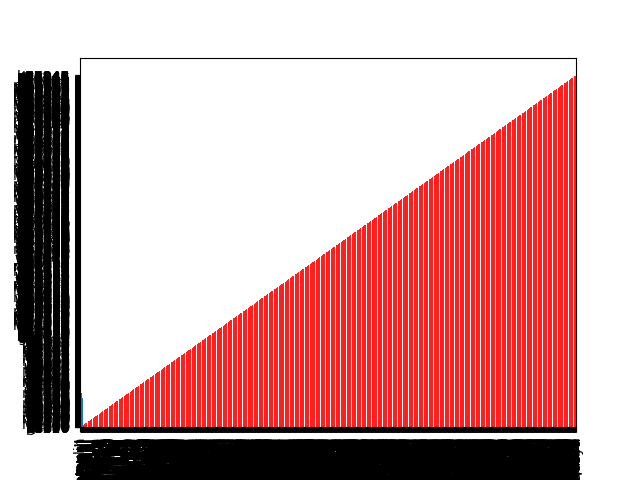

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = id_time_df["Drug Regimen"].value_counts().plot.bar(width=.7)


In [47]:
x_axis = np.arange(len(id_time_df))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, id_time_df["ID_Time"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, id_time_df["Drug Regimen"].value_counts(), rotation="vertical")
plt.show()

ValueError: The number of FixedLocator locations (1888), usually from a call to set_ticks, does not match the number of ticklabels (10).

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
grouped_drug = id_time_df.groupby('Drug Regimen').value_counts()[['Mouse ID']].sum()

fig, ax = plt.subplots()
ax.bar(grouped_drug.sort_values(by = ['Mouse ID']))

#pyplot_bar = id_time_df.plt.bar('drug regimen', 'Mouse ID', color='r', alpha=0.5, align="center" )
plt.title("Title")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show



KeyError: "['Mouse ID'] not in index"

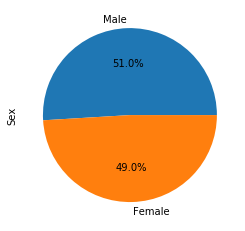

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



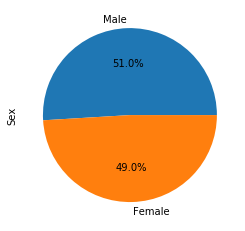

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


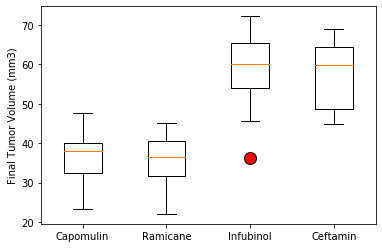

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

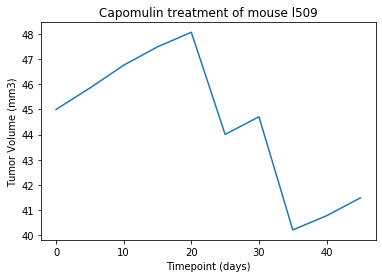

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



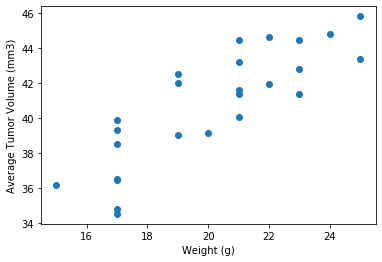

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


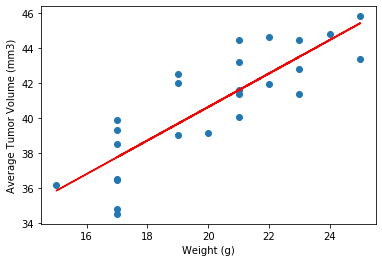

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

